<a href="https://colab.research.google.com/github/shashank559purulia/Predicting-the-Chance-Of-Admit/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1CHMdlUwz-lHtDPVa2qtnImQzm8XDiIXe

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CHMdlUwz-lHtDPVa2qtnImQzm8XDiIXe
To: /content/jambori.csv
100% 16.2k/16.2k [00:00<00:00, 25.3MB/s]


In [2]:
import pandas as pd

In [15]:
jambori=pd.read_csv('jambori.csv')
jambori.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 


In [6]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
jambori=jambori.iloc[:,1:]
jambori.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
jambori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [18]:
jambori.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


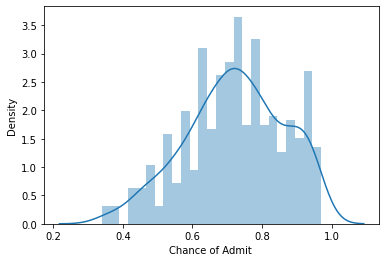

In [12]:
sns.distplot(jambori['Chance of Admit '],bins=25)
plt.show()

In [19]:
jambori.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Scaterplot for Chance of Admit VS GRE Score for diferent University Ratings

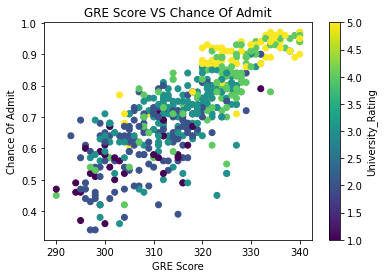

In [20]:
color=jambori['University Rating']
plt.scatter(jambori['GRE Score'],jambori['Chance of Admit '],
           c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('GRE Score')
plt.ylabel('Chance Of Admit')
plt.title('GRE Score VS Chance Of Admit')
plt.show()

Scatterplot for Chance Of Admit VS TOEFL Score for different University Rating

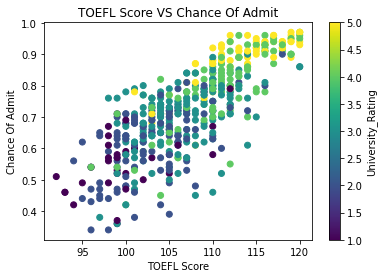

In [21]:
color=jambori['University Rating']
plt.scatter(jambori['TOEFL Score'],jambori['Chance of Admit '],
           c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance Of Admit')
plt.title('TOEFL Score VS Chance Of Admit')
plt.show()

Scatterplot for Chance of Admit vs CGPA for different University Rating

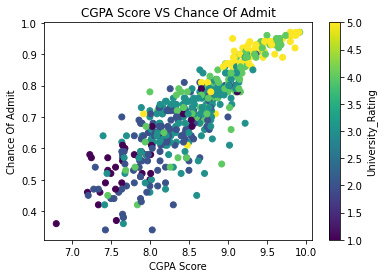

In [22]:
color=jambori['University Rating']
plt.scatter(jambori['CGPA'],jambori['Chance of Admit '],
           c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('CGPA Score')
plt.ylabel('Chance Of Admit')
plt.title('CGPA Score VS Chance Of Admit')
plt.show()

Boxplot for chance of admit for different Universities

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


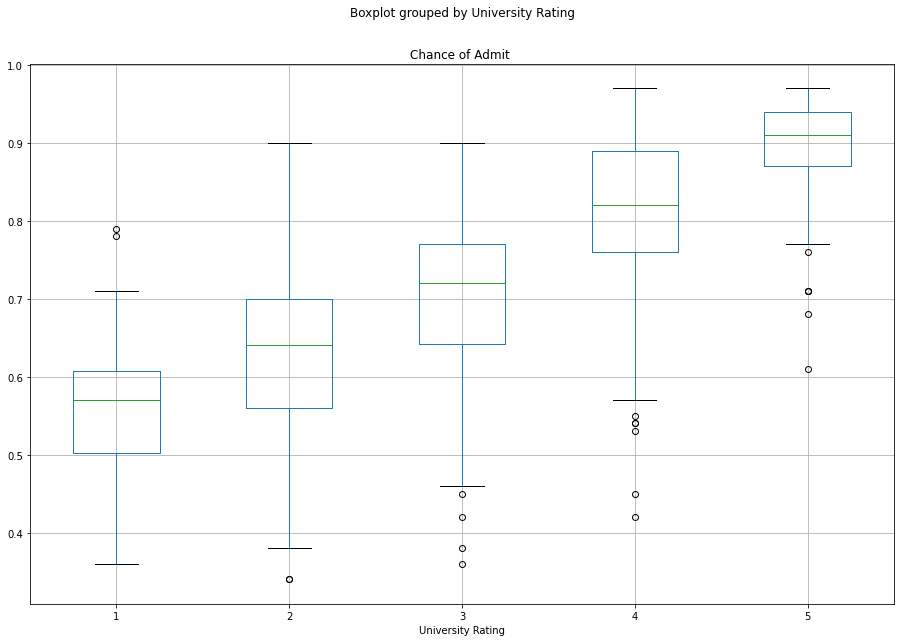

In [23]:
jambori.boxplot(by='University Rating',column='Chance of Admit ',figsize=(15,10))
plt.show()

Boxplot for chance of admit for Researchers and Non_Researchers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


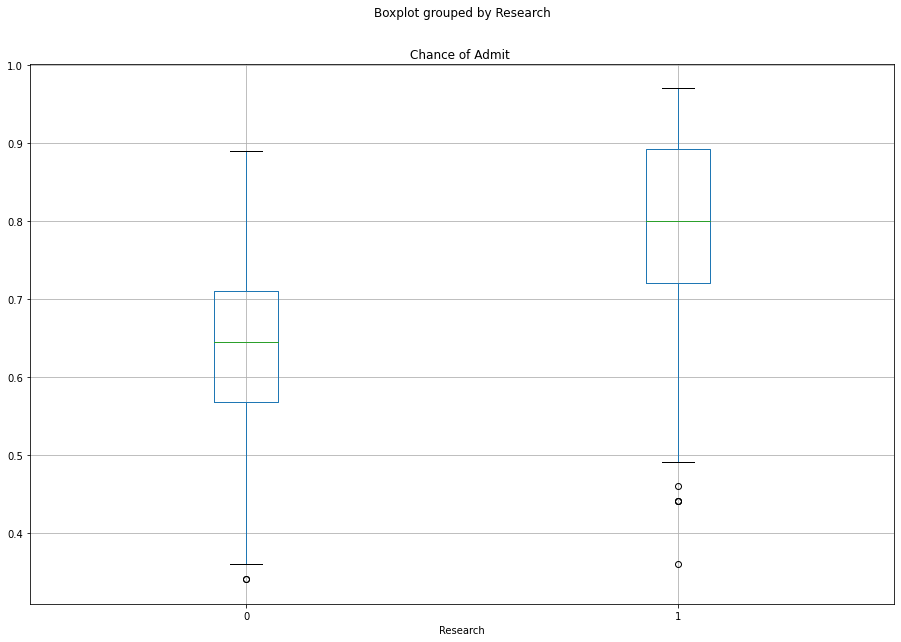

In [24]:
jambori.boxplot(by='Research',column='Chance of Admit ',figsize=(15,10))
plt.show()

Correlation Chart

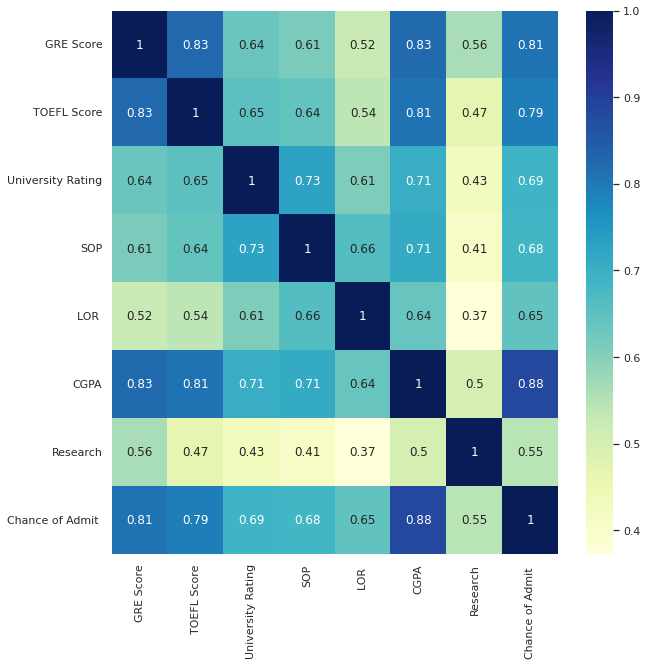

In [25]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(jambori.corr(), cmap="YlGnBu", annot=True)
plt.show()

Splitting the dataset into Training,Testing and Cross-Validation

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=jambori.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [28]:
Y=jambori['Chance of Admit ']
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [29]:
x_trainn,x_test,y_trainn,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.1,random_state=42)

In [30]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(405, 7) (45, 7) (50, 7) (405,) (45,) (50,)


In [31]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

Performing Target Encoding on University Rating

In [32]:
ce_target=ce.TargetEncoder(cols=['University Rating'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [33]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
486,319,102,0.702171,2.5,2.5,8.37,0
246,316,105,0.702171,3.0,3.5,8.73,0
346,304,97,0.630481,1.5,2.0,7.64,0
480,321,102,0.702171,3.5,4.0,9.01,1
329,297,96,0.630481,2.5,1.5,7.89,0
...,...,...,...,...,...,...,...
3,322,110,0.702171,3.5,2.5,8.67,1
133,323,112,0.883793,4.0,4.5,8.78,0
236,325,112,0.803929,4.0,4.5,9.17,1
87,317,107,0.630481,3.5,3.0,8.28,0


In [34]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,0.803929,4.0,3.5,9.54,1
73,314,108,0.803929,4.5,4.0,9.04,1
374,315,105,0.630481,2.0,2.5,7.65,0
155,312,109,0.702171,3.0,3.0,8.69,0
104,326,112,0.702171,3.5,3.0,9.05,1
394,329,111,0.803929,4.5,4.0,9.23,1
377,290,100,0.560667,1.5,2.0,7.56,0
124,301,106,0.803929,2.5,3.0,8.47,0
68,318,109,0.702171,3.5,4.0,9.22,1
450,320,112,0.803929,3.0,4.5,8.86,1


Standarisation of the features

In [35]:
cols=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
d={}
for i in cols:
    mean_i=x_train[i].mean()
    std_i=x_train[i].std()
    x_train[i]=(x_train[i]-mean_i)/std_i
    d[i]=[mean_i,std_i]
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
486,0.241050,-0.842994,0.702171,-0.852452,-1.047733,-0.327829,0
246,-0.028633,-0.354564,0.702171,-0.356413,0.030620,0.274381,0
346,-1.107365,-1.657044,0.630481,-1.844530,-1.586910,-1.548976,0
480,0.420838,-0.842994,0.702171,0.139626,0.569797,0.742767,1
329,-1.736625,-1.819854,0.630481,-0.852452,-2.126087,-1.130775,0
...,...,...,...,...,...,...,...
3,0.510733,0.459486,0.702171,0.139626,-1.047733,0.174013,1
133,0.600627,0.785106,0.883793,0.635665,1.108973,0.358022,0
236,0.780416,0.785106,0.803929,0.635665,1.108973,1.010416,1
87,0.061261,-0.028944,0.630481,0.139626,-0.508557,-0.478381,0


In [36]:
for i in cols:
  x_val[i]=(x_val[i]-d[i][0])/d[i][1]
  x_test[i]=(x_test[i]-d[i][0])/d[i][1]
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,1.589464,1.436346,0.803929,0.635665,0.030620,1.629354,1
73,-0.208422,0.133866,0.803929,1.131704,0.569797,0.792951,1
374,-0.118527,-0.354564,0.630481,-1.348491,-1.047733,-1.532248,0
155,-0.388210,0.296676,0.702171,-0.356413,-0.508557,0.207469,0
104,0.870310,0.785106,0.702171,0.139626,-0.508557,0.809679,1
394,1.139993,0.622296,0.803929,1.131704,0.569797,1.110784,1
377,-2.365885,-1.168614,0.560667,-1.844530,-1.586910,-1.682801,0
124,-1.377047,-0.191754,0.803929,-0.852452,-0.508557,-0.160548,0
68,0.151156,0.296676,0.702171,0.139626,0.569797,1.094056,1
450,0.330944,0.785106,0.803929,-0.356413,1.108973,0.491846,1


Performing Linear Regression

In [37]:
from sklearn.linear_model import Ridge

In [38]:
from sklearn.metrics import mean_squared_error

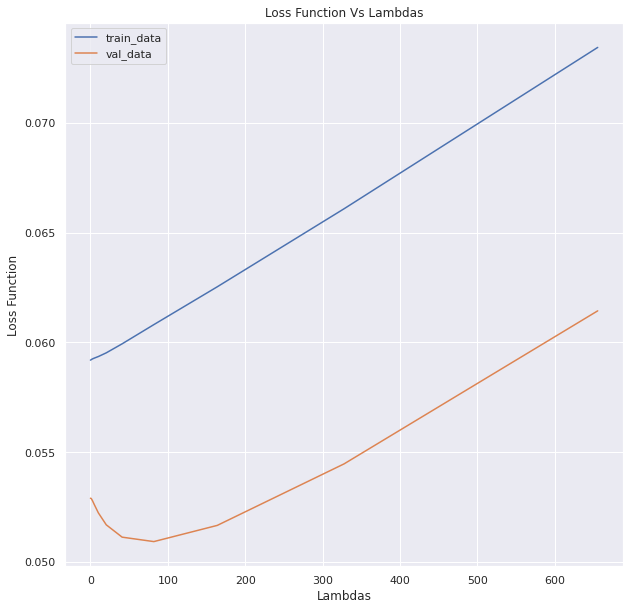

In [39]:
c=0.01
alphas=[]
train_cost=[]
val_cost=[]
while c<=1000:
    ridge=Ridge(alpha=c)
    ridge.fit(x_train,y_train)
    y_hat=ridge.predict(x_train)
    y_pred=ridge.predict(x_val)
    tr_cost=np.sqrt(mean_squared_error(y_train,y_hat))
    vl_cost=np.sqrt(mean_squared_error(y_val,y_pred))
    train_cost.append(tr_cost)
    val_cost.append(vl_cost)
    alphas.append(c)
    c*=2
plt.plot(alphas,train_cost,label='train_data')
plt.plot(alphas,val_cost,label='val_data')
plt.xlabel('Lambdas')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Lambdas')
plt.legend()
plt.show()

Finding the Lambda best

In [44]:
z=np.argmin(val_cost)
lbest=0.01*(2**z)
lbest

81.92

Performing Linear Regression for lambda best

In [45]:
ridge=Ridge(alpha=lbest)
ridge.fit(x_train,y_train)

Ridge(alpha=81.92)

In [46]:
ridge.score(x_train,y_train)

0.8132899292248097

In [47]:
ridge.score(x_test,y_test)

0.7935231113376271

In [48]:
ridge.score(x_val,y_val)

0.8408804418796105

Checking VIF Scores

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
X_t = x_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.54
5,CGPA,4.44
1,TOEFL Score,3.81
6,Research,3.47
2,University Rating,2.92
3,SOP,2.42
4,LOR,1.96


Residual Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


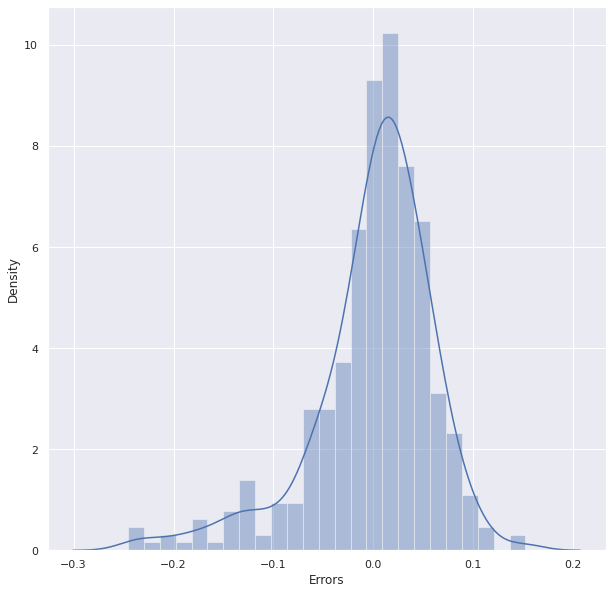

In [51]:
pred=ridge.predict(x_train)
errors=y_train-pred
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

Checking for Heteroscedascity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'erros')

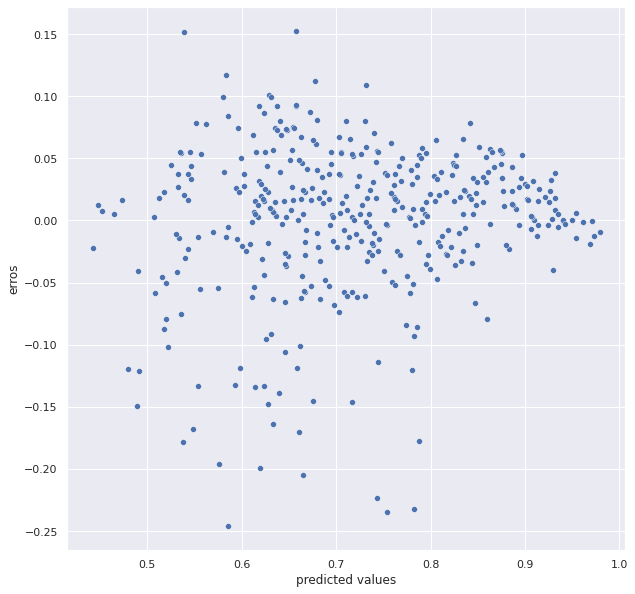

In [52]:
sns.scatterplot(pred,errors )
plt.xlabel('predicted values')
plt.ylabel('erros')

In [59]:
x_train['errors']=errors

In [60]:
x_train=pd.concat([x_train,y_train],axis=1)
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,errors,Chance of Admit,Chance of Admit
486,0.241050,-0.842994,0.702171,-0.852452,-1.047733,-0.327829,0,0.026607,0.68,0.68
246,-0.028633,-0.354564,0.702171,-0.356413,0.030620,0.274381,0,0.008309,0.72,0.72
346,-1.107365,-1.657044,0.630481,-1.844530,-1.586910,-1.548976,0,-0.045597,0.47,0.47
480,0.420838,-0.842994,0.702171,0.139626,0.569797,0.742767,1,0.031743,0.80,0.80
329,-1.736625,-1.819854,0.630481,-0.852452,-2.126087,-1.130775,0,-0.087606,0.43,0.43
...,...,...,...,...,...,...,...,...,...,...
3,0.510733,0.459486,0.702171,0.139626,-1.047733,0.174013,1,0.055193,0.80,0.80
133,0.600627,0.785106,0.883793,0.635665,1.108973,0.358022,0,-0.001216,0.79,0.79
236,0.780416,0.785106,0.803929,0.635665,1.108973,1.010416,1,0.005084,0.85,0.85
87,0.061261,-0.028944,0.630481,0.139626,-0.508557,-0.478381,0,-0.021234,0.66,0.66


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


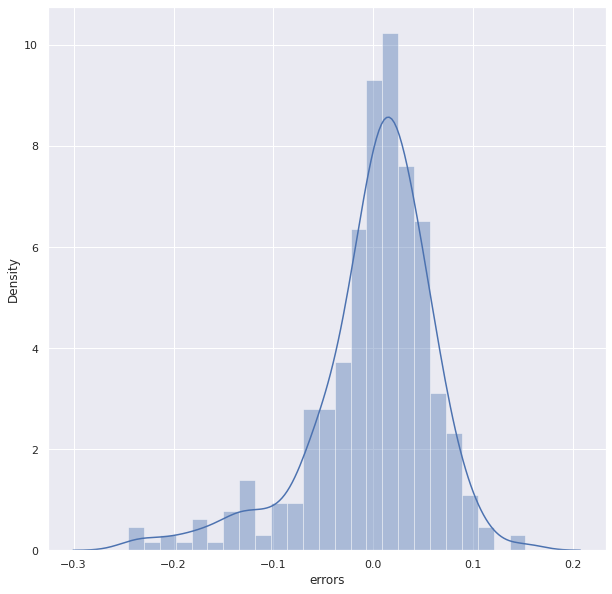

In [61]:
sns.distplot(x_train['errors'])

Removing the Outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


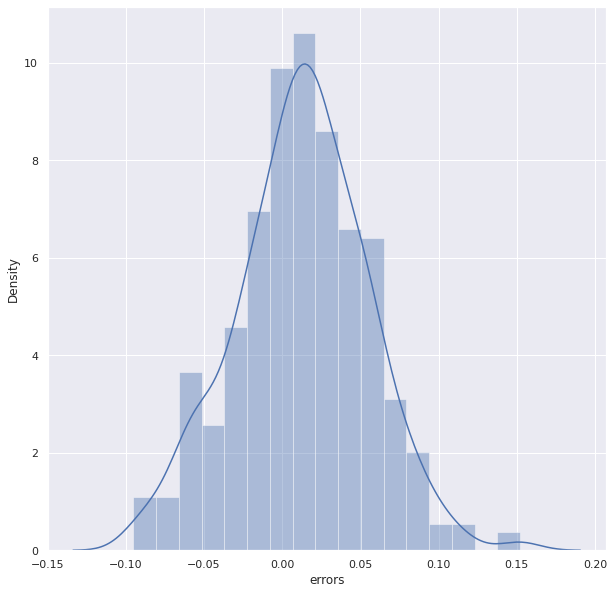

In [62]:
x_train1=x_train[(x_train['errors']>=-0.1)&(x_train['errors']<=0.16)]
sns.distplot(x_train1['errors'])

In [64]:
x_train1=x_train1.drop(['errors', 'Chance of Admit '],axis=1)
x_train1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
486,0.241050,-0.842994,0.702171,-0.852452,-1.047733,-0.327829,0
246,-0.028633,-0.354564,0.702171,-0.356413,0.030620,0.274381,0
346,-1.107365,-1.657044,0.630481,-1.844530,-1.586910,-1.548976,0
480,0.420838,-0.842994,0.702171,0.139626,0.569797,0.742767,1
329,-1.736625,-1.819854,0.630481,-0.852452,-2.126087,-1.130775,0
...,...,...,...,...,...,...,...
3,0.510733,0.459486,0.702171,0.139626,-1.047733,0.174013,1
133,0.600627,0.785106,0.883793,0.635665,1.108973,0.358022,0
236,0.780416,0.785106,0.803929,0.635665,1.108973,1.010416,1
87,0.061261,-0.028944,0.630481,0.139626,-0.508557,-0.478381,0


In [63]:
y_train1=x_train1['Chance of Admit ']

,Chance of Admit,Chance of Admit
486,0.68,0.68
246,0.72,0.72
346,0.47,0.47
480,0.80,0.80
329,0.43,0.43
...,...,...
3,0.80,0.80
133,0.79,0.79
236,0.85,0.85
87,0.66,0.66


In [66]:
y_train1=y_train1.iloc[:,0]
y_train1

486    0.68
246    0.72
346    0.47
480    0.80
329    0.43
       ... 
3      0.80
133    0.79
236    0.85
87     0.66
45     0.88
Name: Chance of Admit , Length: 375, dtype: float64

Performing Linear Regression

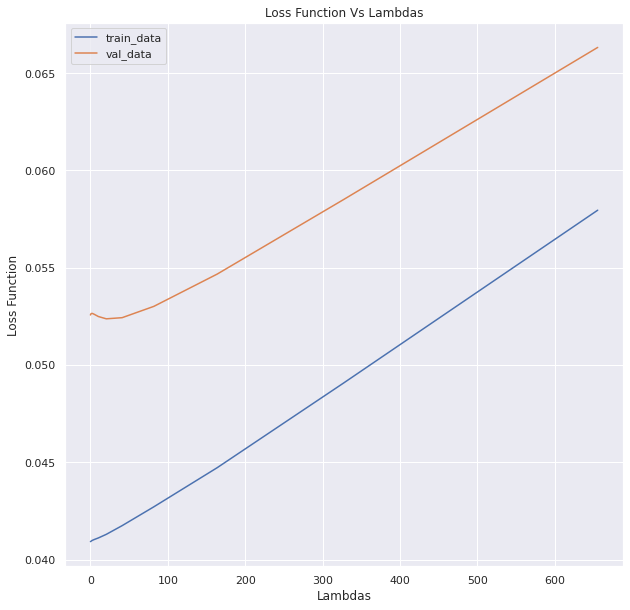

In [67]:
c=0.01
alphas=[]
train_cost=[]
val_cost=[]
while c<=1000:
    ridge=Ridge(alpha=c)
    ridge.fit(x_train1,y_train1)
    y_hat=ridge.predict(x_train1)
    y_pred=ridge.predict(x_val)
    tr_cost=np.sqrt(mean_squared_error(y_train1,y_hat))
    vl_cost=np.sqrt(mean_squared_error(y_val,y_pred))
    train_cost.append(tr_cost)
    val_cost.append(vl_cost)
    alphas.append(c)
    c*=2
plt.plot(alphas,train_cost,label='train_data')
plt.plot(alphas,val_cost,label='val_data')
plt.xlabel('Lambdas')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Lambdas')
plt.legend()
plt.show()

Finding the lambda best

In [69]:
z=np.argmin(val_cost)
lbest=0.01*(2**z)
lbest

20.48

Perorming Linear Regression on lambda best

In [70]:
ridge=Ridge(alpha=lbest)
ridge.fit(x_train1,y_train1)

Ridge(alpha=20.48)

In [71]:
ridge.score(x_train1,y_train1)

0.8915232577413981

In [72]:
ridge.score(x_test,y_test)

0.7746743233010861

In [73]:
ridge.score(x_val,y_val)

0.83173246907491

In [74]:
vif = pd.DataFrame()
X_t = x_train1
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.52
5,CGPA,4.46
1,TOEFL Score,3.76
6,Research,3.73
2,University Rating,3.05
3,SOP,2.57
4,LOR,1.92


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


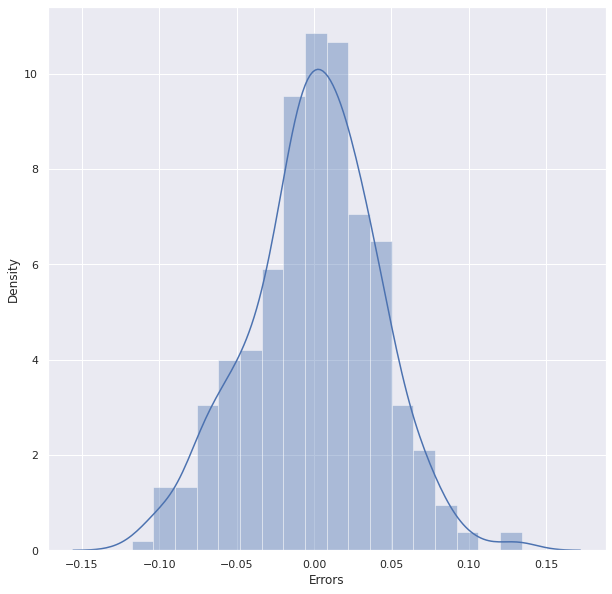

In [75]:
pred=ridge.predict(x_train1)
errors=y_train1-pred
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'erros')

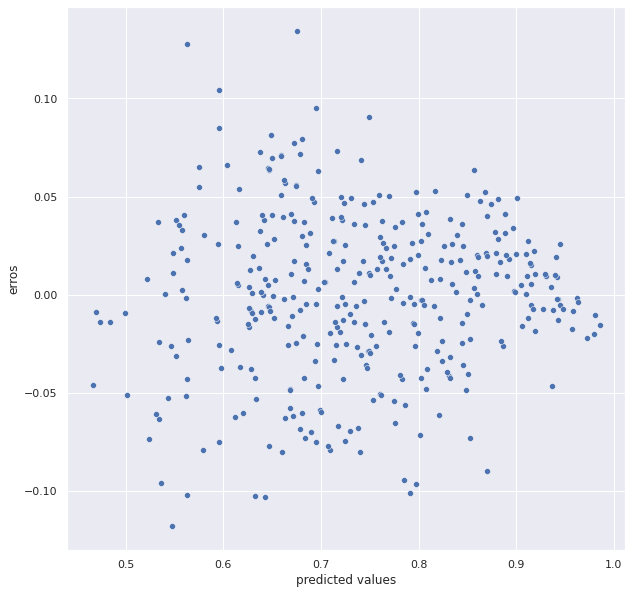

In [76]:
sns.scatterplot(pred,errors )
plt.xlabel('predicted values')
plt.ylabel('erros')

Decision Tree Regressor

In [94]:
X=jambori.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [95]:
Y=jambori['Chance of Admit ']
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [96]:
x_trainn,x_test,y_trainn,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.1,random_state=42)

In [97]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(405, 7) (45, 7) (50, 7) (405,) (45,) (50,)


In [98]:
ce_target=ce.TargetEncoder(cols=['University Rating'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [101]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,0.803929,4.0,3.5,9.54,1
73,314,108,0.803929,4.5,4.0,9.04,1
374,315,105,0.630481,2.0,2.5,7.65,0
155,312,109,0.702171,3.0,3.0,8.69,0
104,326,112,0.702171,3.5,3.0,9.05,1
394,329,111,0.803929,4.5,4.0,9.23,1
377,290,100,0.560667,1.5,2.0,7.56,0
124,301,106,0.803929,2.5,3.0,8.47,0
68,318,109,0.702171,3.5,4.0,9.22,1
450,320,112,0.803929,3.0,4.5,8.86,1


In [77]:
from sklearn.tree import DecisionTreeRegressor

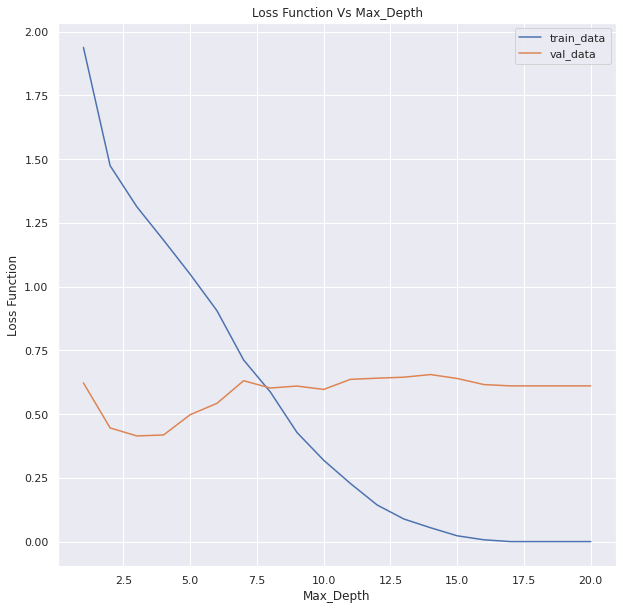

In [102]:

train_cost=[]
val_cost=[]
depth=1
maxdepth=[]
while depth<=20:
    reg=DecisionTreeRegressor(random_state=0,max_depth=depth)
    reg.fit(x_train,y_train)
    y_hat=reg.predict(x_train)
    y_pred=reg.predict(x_val)
    tr_cost=np.sqrt(np.sum((y_train-y_hat)**2))
    vl_cost=np.sqrt(np.sum((y_val-y_pred)**2))
    train_cost.append(tr_cost)
    val_cost.append(vl_cost)
    maxdepth.append(depth)
    depth+=1
plt.plot(maxdepth,train_cost,label='train_data')
plt.plot(maxdepth,val_cost,label='val_data')
plt.xlabel('Max_Depth')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Max_Depth')
plt.legend()
plt.show()

In [103]:
z=np.argmin(val_cost)
depth_best=z+1

In [104]:
reg=DecisionTreeRegressor(random_state=0,max_depth=depth_best)
reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [105]:
reg.score(x_train,y_train)

0.7848566460427377

In [106]:
reg.score(x_test,y_test)

0.7654519475110757

In [107]:
reg.score(x_val,y_val)

0.7657460546708306

Performing Ensemble Models

1)BaggingRegressor

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X=jambori.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [110]:
Y=jambori['Chance of Admit ']
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [111]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [112]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(425, 7) (425,) (75, 7) (75,)


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_validate

In [114]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [115]:
rf_model=RandomForestRegressor(random_state=1)
fold=KFold(n_splits=5)
params={'n_estimators':[25,50],
        'max_depth':[5,8,12,15,20],
        'max_samples':[0.60,0.80,1],
        'max_features':[0.60,0.80,1]}

In [116]:
reg=GridSearchCV(rf_model,params,cv=fold,n_jobs=-1)

In [117]:
reg.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 12, 15, 20],
                         'max_features': [0.6, 0.8, 1],
                         'max_samples': [0.6, 0.8, 1],
                         'n_estimators': [25, 50]})

In [118]:
reg.best_estimator_

RandomForestRegressor(max_depth=5, max_features=0.6, max_samples=0.8,
                      n_estimators=50, random_state=1)

In [119]:
df=pd.DataFrame(reg.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067128,0.003670,0.009171,0.000305,5,0.6,0.6,25,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.812367,0.705353,0.831038,0.798061,0.842563,0.797876,0.048718,7
1,0.134628,0.004754,0.018080,0.007406,5,0.6,0.6,50,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.825607,0.713735,0.830390,0.791268,0.860131,0.804226,0.050246,2
2,0.068008,0.002723,0.009741,0.000419,5,0.6,0.8,25,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.830542,0.698444,0.827708,0.799779,0.847965,0.800888,0.053499,3
3,0.130098,0.003906,0.014128,0.000480,5,0.6,0.8,50,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.836429,0.702006,0.831963,0.795362,0.857080,0.804568,0.055003,1
4,0.068493,0.013768,0.010546,0.002930,5,0.6,1,25,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",-0.042390,-0.034280,-0.031479,-0.013828,-0.013669,-0.027129,0.011498,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.129688,0.002624,0.014888,0.000988,20,1,0.6,50,"{'max_depth': 20, 'max_features': 1, 'max_samp...",0.811768,0.700093,0.811497,0.771296,0.830809,0.785092,0.046720,47
86,0.073571,0.005245,0.010920,0.002389,20,1,0.8,25,"{'max_depth': 20, 'max_features': 1, 'max_samp...",0.804232,0.695464,0.819397,0.783340,0.823322,0.785151,0.046991,46
87,0.131118,0.003881,0.015643,0.000405,20,1,0.8,50,"{'max_depth': 20, 'max_features': 1, 'max_samp...",0.818194,0.693028,0.822737,0.784673,0.824980,0.788722,0.050028,34
88,0.063744,0.004051,0.009911,0.000506,20,1,1,25,"{'max_depth': 20, 'max_features': 1, 'max_samp...",-0.042390,-0.034280,-0.031479,-0.013828,-0.013669,-0.027129,0.011498,61


In [120]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_samples',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [121]:
df1=df[['param_max_depth', 'param_max_features', 'param_max_samples', 'param_n_estimators','mean_test_score']]
df1.sort_values(by='mean_test_score',ascending=False)

,param_max_depth,param_max_features,param_max_samples,param_n_estimators,mean_test_score
3,5,0.6,0.8,50,0.804568
1,5,0.6,0.6,50,0.804226
2,5,0.6,0.8,25,0.800888
21,8,0.6,0.8,50,0.800435
7,5,0.8,0.6,50,0.798555
...,...,...,...,...,...
41,12,0.6,1,50,-0.027568
35,8,1,1,50,-0.027568
29,8,0.8,1,50,-0.027568
17,5,1,1,50,-0.027568


In [122]:
reg=RandomForestRegressor(n_estimators=50,max_depth=5,max_features=0.6,max_samples=0.8,n_jobs=-1,random_state=1)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features=0.6, max_samples=0.8,
                      n_estimators=50, n_jobs=-1, random_state=1)

In [123]:
reg.score(x_train,y_train)

0.877648989517171

In [124]:
reg.score(x_test,y_test)

0.811796608504227

2)BoostingRegressor

In [125]:
from xgboost import XGBRegressor

In [126]:
xgb_model=XGBRegressor(random_state=1)
fold=KFold(n_splits=5)
params={'n_estimators':[25,50],
        'eta':[0.1,0.5,0.8],
        'max_depth':[2,3,4,5],
        'sub_sample':[0.60,0.80,1],
        'colsample_bytree':[0.60,0.80,1]}

In [127]:
reg=GridSearchCV(xgb_model,params,cv=fold,n_jobs=-1)

In [128]:
reg.fit(x_train,y_train)

[12:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(random_state=1), n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'eta': [0.1, 0.5, 0.8], 'max_depth': [2, 3, 4, 5],
                         'n_estimators': [25, 50],
                         'sub_sample': [0.6, 0.8, 1]})

In [129]:
reg.best_estimator_

XGBRegressor(colsample_bytree=0.8, eta=0.1, n_estimators=50, random_state=1,
             sub_sample=0.6)

In [131]:
df=pd.DataFrame(reg.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_eta,param_max_depth,param_n_estimators,param_sub_sample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071997,0.068731,0.003777,0.002456,0.6,0.1,2,25,0.6,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.798537,0.681657,0.779189,0.763381,0.801098,0.764772,0.043766,181
1,0.017704,0.005211,0.002035,0.000093,0.6,0.1,2,25,0.8,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.798537,0.681657,0.779189,0.763381,0.801098,0.764772,0.043766,181
2,0.018113,0.005748,0.002030,0.000078,0.6,0.1,2,25,1,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.798537,0.681657,0.779189,0.763381,0.801098,0.764772,0.043766,181
3,0.020271,0.002153,0.002268,0.000247,0.6,0.1,2,50,0.6,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.815963,0.689224,0.820548,0.792239,0.842829,0.792161,0.053918,46
4,0.025068,0.005803,0.002207,0.000056,0.6,0.1,2,50,0.8,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.815963,0.689224,0.820548,0.792239,0.842829,0.792161,0.053918,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.020850,0.000490,0.003203,0.001808,1,0.8,5,25,0.8,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.772273,0.656168,0.782845,0.786631,0.756675,0.750918,0.048500,208
212,0.021368,0.000649,0.002265,0.000067,1,0.8,5,25,1,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.772273,0.656168,0.782845,0.786631,0.756675,0.750918,0.048500,208
213,0.034130,0.000705,0.002433,0.000043,1,0.8,5,50,0.6,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.781733,0.654261,0.810445,0.797965,0.788954,0.766672,0.057017,145
214,0.036568,0.001968,0.002409,0.000030,1,0.8,5,50,0.8,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.781733,0.654261,0.810445,0.797965,0.788954,0.766672,0.057017,145


In [132]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bytree', 'param_eta', 'param_max_depth',
       'param_n_estimators', 'param_sub_sample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [133]:
df1=df[['param_max_depth','param_colsample_bytree', 'param_eta','param_n_estimators', 'param_sub_sample','mean_test_score']]
df1.sort_values(by='mean_test_score',ascending=False)

,param_max_depth,param_colsample_bytree,param_eta,param_n_estimators,param_sub_sample,mean_test_score
83,3,0.8,0.1,50,1,0.794837
131,3,0.8,0.8,50,1,0.794837
130,3,0.8,0.8,50,0.8,0.794837
105,3,0.8,0.5,50,0.6,0.794837
106,3,0.8,0.5,50,0.8,0.794837
...,...,...,...,...,...,...
210,5,1,0.8,25,0.6,0.750918
211,5,1,0.8,25,0.8,0.750918
212,5,1,0.8,25,1,0.750918
186,5,1,0.5,25,0.6,0.750918


In [134]:
reg=XGBRegressor(n_estimators=50,max_depth=3,colsample_bytree=0.8,sub_samples=0.8,eta=0.1,n_jobs=-1,random_state=1)
reg.fit(x_train,y_train)

[12:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, n_estimators=50, n_jobs=-1,
             random_state=1, sub_samples=0.8)

In [135]:
reg.score(x_train,y_train)

0.881139199754993

In [137]:
reg.score(x_test,y_test)

0.807461687814893